# HW 4

## Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [139]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [140]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [141]:
from sklearn.model_selection import train_test_split
# Датафрейм с признаками по схеме
X = pd.DataFrame(boston.data, columns=boston.feature_names)
# Датафрейм с целевым признаком цены на недвижимость
y = pd.DataFrame(boston.target, columns=["price"])
# Поделим на тестовые и тренировочные данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Создадим стандартизированные данные тренировочных и тестовых данных
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [143]:
from sklearn.manifold import TSNE
# Создадим модель tSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

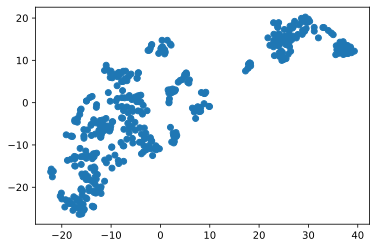

In [144]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

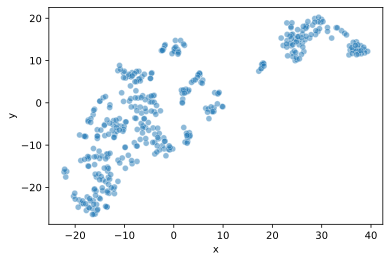

In [145]:
import seaborn as sns

# Отрисуем seaborn'ом
sns.scatterplot(data=pd.DataFrame({
    "x": X_train_tsne[:, 0],
    "y": X_train_tsne[:, 1],
}), x="x", y="y", alpha=.5)

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [146]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

<AxesSubplot:xlabel='x', ylabel='y'>

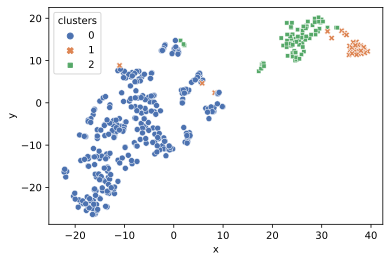

In [147]:
labels_train = model.fit_predict(X_train)

sns.scatterplot(data=pd.DataFrame({
    "x": X_train_tsne[:, 0],
    "y": X_train_tsne[:, 1],
    "clusters": labels_train,
}), x="x", y="y", hue="clusters", style="clusters", palette="deep")


In [148]:
print('PRICE:')
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

print('\nCRIM:')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

PRICE:
Кластер 0: 25.16868686868687
Кластер 1: 13.196774193548388
Кластер 1: 17.442105263157895

CRIM:
Кластер 0: 0.40486282828282827
Кластер 1: 14.360380322580646
Кластер 1: 11.745661842105262


### *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [149]:
# Проведем кластеризацию
labels_test = model.predict(X_test)

print('PRICE:')
print('Кластер 0: {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 2, 'price'].mean()))

print('\nCRIM:')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))


PRICE:
Кластер 0: 23.91159420289855
Кластер 1: 12.814285714285713
Кластер 1: 17.392307692307693

CRIM:
Кластер 0: 0.24642115942028991
Кластер 1: 19.021665714285714
Кластер 1: 8.469301923076923


<AxesSubplot:xlabel='x', ylabel='y'>

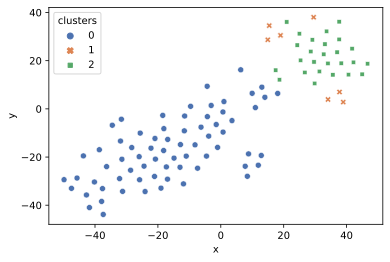

In [151]:
# Приведем признаки тестовых данных в 2D вид
X_test_tsne = tsne.fit_transform(X_test_scaled)

# Покажем как распределились предсказанные данные на графике тестовых данных
sns.scatterplot(data=pd.DataFrame({
    "x": X_test_tsne[:, 0],
    "y": X_test_tsne[:, 1],
    "clusters": labels_test,
}), x="x", y="y", hue="clusters", style="clusters", palette="deep")

# Нужно проверять что не то с данными 1 клвстера, их слишком мало?